## Imports

In [5]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import model_selection
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import re
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

import time

## Loading + Pre-processing

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', delim_whitespace = False,header=None)
df = df.replace("?",np.NAN)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [9]:
df = df.drop(df.columns[3], axis=1) # dropping the third column it's just a bunch of unique city names

In [10]:
from sklearn.impute import SimpleImputer # need to impute missing values

In [11]:
imp = SimpleImputer(missing_values=np.NAN, strategy='mean') #instantiate imputer

for col in df.columns:
    if df[col].isna().sum(): # if it's greater than 0, (i.e. any integer greater than 0 will print true)
        df[col] = imp.fit_transform(np.array(df[col]).reshape(-1,1))

print('Done imputing values')

Done imputing values


In [12]:
df.isna().sum().sum()

0

No more NaN values

### Splitting and Scaling

In [13]:
X = df.drop(df.columns[-1], axis=1) # the last column is the one we want to predict

y = df[df.columns[-1]]

#normalize X
X=(X-X.mean())/X.std()

#Split data from X, y into training, validation, and testing (approximately a 70, 20, 10 split, respectively).
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.90, random_state = 1)

#Now from this, we will split the X_train, y_train AGAIN to get X_train, y_train, x_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.75, random_state = 1)

print(f'Size of X_train: {len(X_train)}')
print(f'Size of y_train: {len(y_train)}')
print('---------------------------------')
print(f'Size of X_val: {len(X_val)}')
print(f'Size of y_val: {len(y_val)}')
print('---------------------------------')
print(f'Size of X_test: {len(X_test)}')
print(f'Size of y_test: {len(y_test)}')

Size of X_train: 1345
Size of y_train: 1345
---------------------------------
Size of X_val: 449
Size of y_val: 449
---------------------------------
Size of X_test: 200
Size of y_test: 200


## Initial Model development

In [ ]:
def initial_model():

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(32,activation='relu',input_shape=(X_train.shape[1],)))

    model.add(layers.Dense(15,activation='relu'))

    model.add(layers.Dense(5,activation='relu'))

    model.add(layers.Dense(1))

    # model.compile(optimizer=opt,loss=loss,metrics=['mae'])

    # model.summary()

    return model

## Analyzing Loss functions

We'll analyze the following loss functions for regression:
* MSE
* MAE
* LogCosh
* Huber

Note: We'll keep the optimizer constant w/ Adam

In [ ]:
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### MSE

In [ ]:
MSE_loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
# opt=tf.keras.optimizers.Adam()

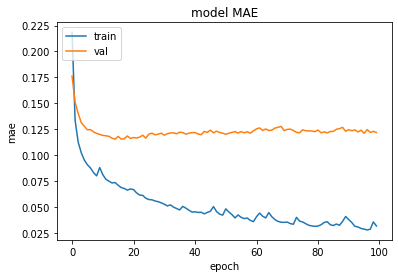

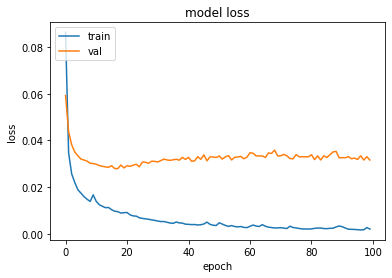

7/7 [==============================] - 0s 4ms/step - loss: 0.0351 - mae: 0.1290
Model performance, baseline, MSE loss w/ Adam Opt: [0.03509734198451042, 0.12897156178951263]


In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MSE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=opt, loss=MSE_loss, metrics=['mae'])
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
print(f'Model performance, baseline, MSE loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

Let's tweak the LR and batch size

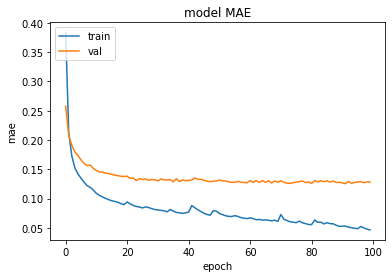

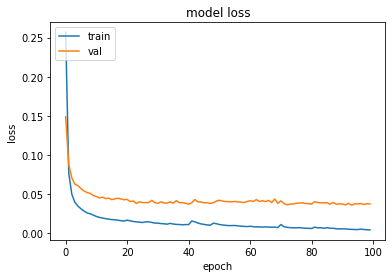

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00085) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MSE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 64, #increasing batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Increasing batch_size and decreasing LR more:

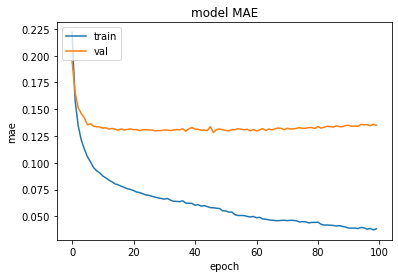

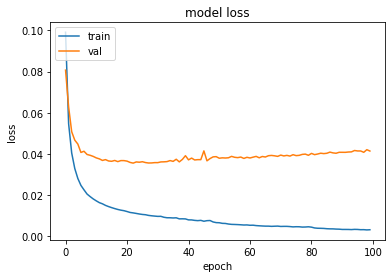

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MSE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 85, #increasing batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Made it worst, we'll re-train on the previous model

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00085) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MSE_loss, metrics=["mae"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, 
                    batch_size= 64, #increasing batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)
print(f'Model performance, optimized, MSE loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0216 - mae: 0.1035
Model performance, optimized, MSE loss w/ Adam Opt: [0.02158476412296295, 0.10348600149154663]


### MAE

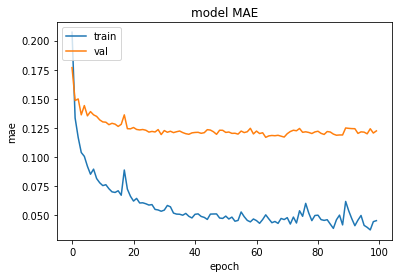

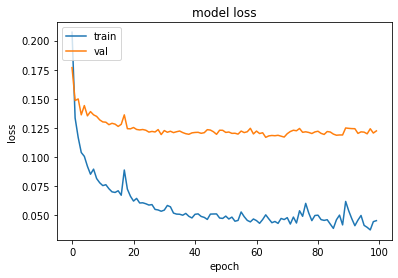

7/7 [==============================] - 0s 3ms/step - loss: 0.0974 - mae: 0.0974
Model performance, baseline, MAE loss w/ Adam Opt: [0.09739352017641068, 0.09739352017641068]


In [ ]:
MAE_loss = tf.keras.losses.MeanAbsoluteError(
    reduction="auto", name="mean_absolute_error"
)

model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MAE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=opt, loss=MAE_loss, metrics=['mae'])
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
print(f'Model performance, baseline, MAE loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

Let's tune w/ LR, batch_size, etc.

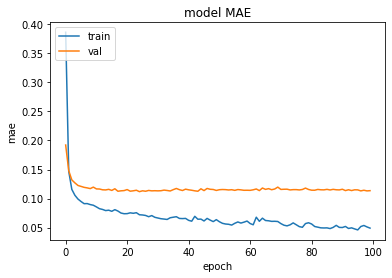

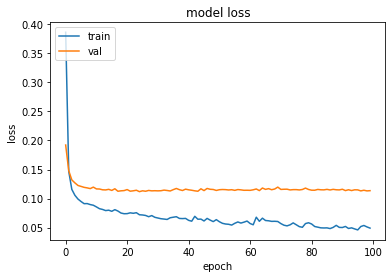

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00085) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MAE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 64,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)


Still over-fitting, let's reduce the LR and the maybe try reducing the batch size

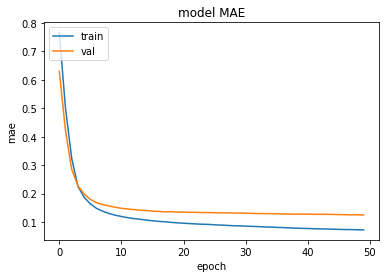

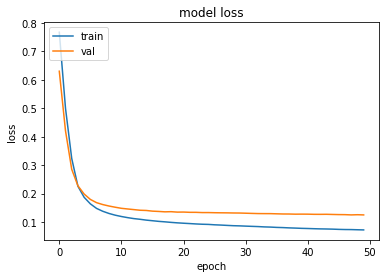

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00045) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MAE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=50, 
                    batch_size= 128,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)


Good, let's re-train the model at around 35ish epochs

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00045) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=MAE_loss, metrics=["mae"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=45, 
                    batch_size=128,
                    # validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)
print(f'Model performance, optimized, MAE loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

7/7 [==============================] - 0s 3ms/step - loss: 0.1008 - mae: 0.1008
Model performance, optimized, MAE loss w/ Adam Opt: [0.10077644139528275, 0.10077644139528275]


### LogCosh

In [ ]:
logcosh_loss = tf.keras.losses.LogCosh(reduction="auto", name="log_cosh")

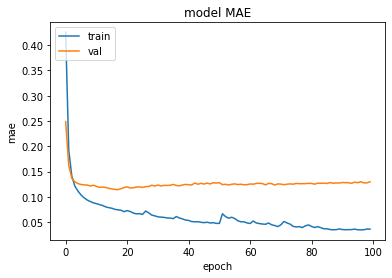

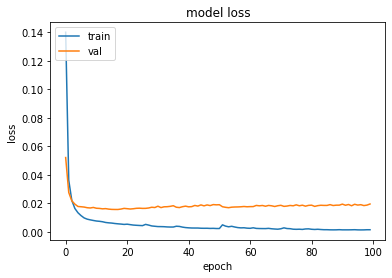

7/7 [==============================] - 0s 3ms/step - loss: 0.0125 - mae: 0.1093
Model performance, baseline, logcosh loss w/ Adam Opt: [0.012476141564548016, 0.10927176475524902]


In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=logcosh_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=opt, loss=logcosh_loss, metrics=['mae'])
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
print(f'Model performance, baseline, logcosh loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

Let's reduce the LR, reduce epocjhs to 50

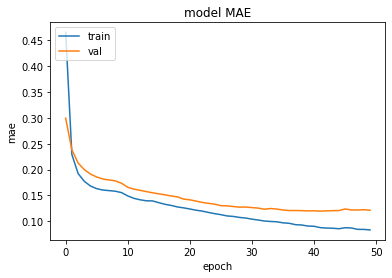

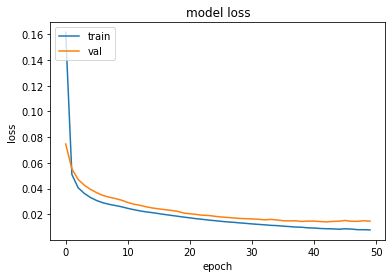

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00085) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=logcosh_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=50, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Looks good, maybe let me try reducing LR a bit mroe

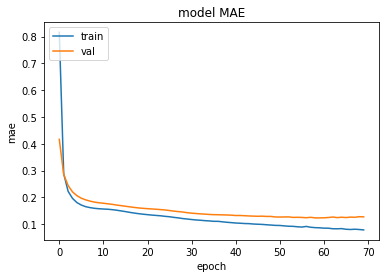

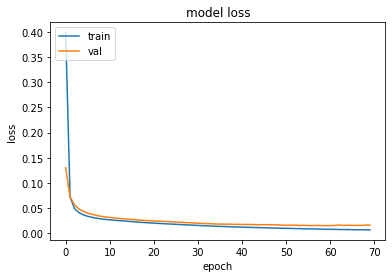

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=logcosh_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=70, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Looks better, let me now re-train

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00075)

#Compiling the model
model.compile(optimizer=opt, loss=logcosh_loss, metrics=["mae"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=65, 
                    batch_size= 32,
                    # validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)
print(f'Model performance, optimized, logcosh loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.1072
Model performance, optimized, logcosh loss w/ Adam Opt: [0.01124880276620388, 0.1071576327085495]


### Huber

In [ ]:
huber_loss = tf.keras.losses.Huber(delta=1.0, reduction="auto", name="huber_loss")

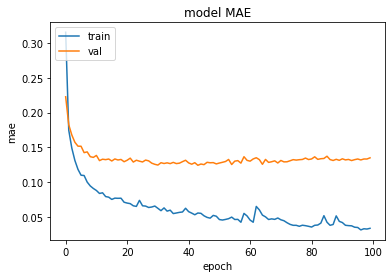

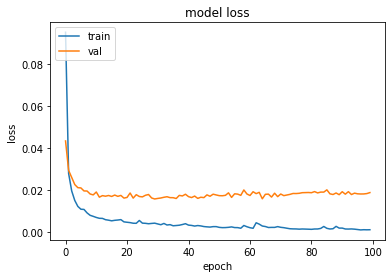

7/7 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.1168
Model performance, baseline, logcosh loss w/ Adam Opt: [0.01453818753361702, 0.11680534482002258]


In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=opt, loss=huber_loss, metrics=['mae'])
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
print(f'Model performance, baseline, logcosh loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

Let's start tuning.
1. LR

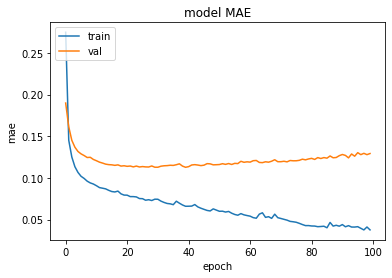

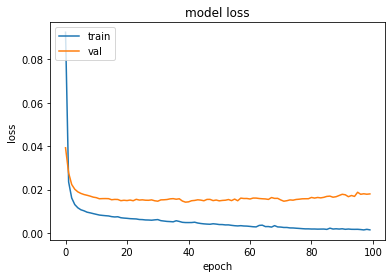

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0009) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Still over-fitting

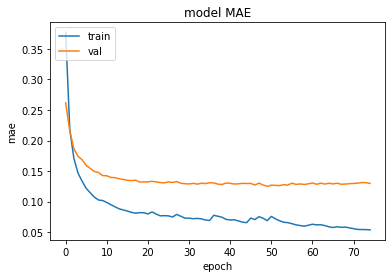

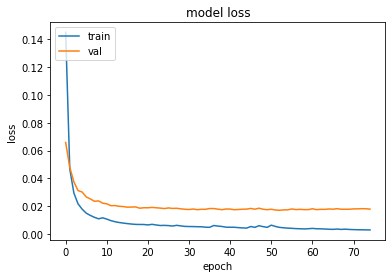

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0009) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=75,  #decreased epochs 
                    batch_size= 64, #increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

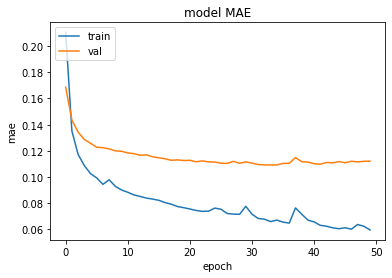

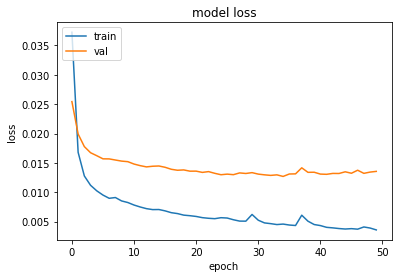

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0008) #default adam learning rate

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=50,  #decreased epochs 
                    batch_size= 64, #increased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Still overfitting

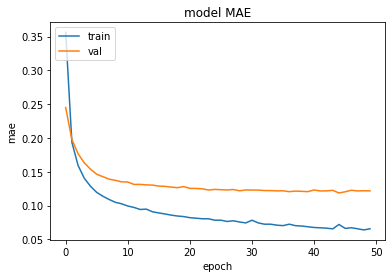

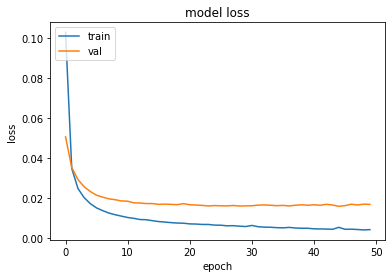

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00045) #decreased lR

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=50,  #decreased epochs 
                    batch_size= 32, #decreased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

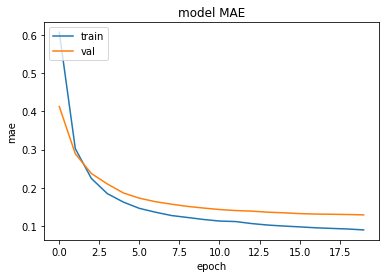

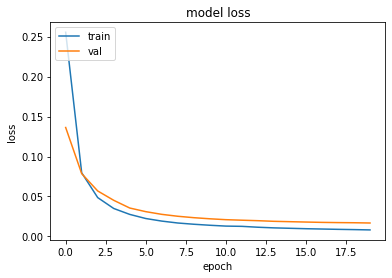

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00045) #decreased lR

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=20,  #decreased epochs 
                    batch_size= 32, #decreased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

Looks good, let's combine the training and val data and train and evaluate on the test data

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.00045) #decreased lR

#Compiling the model
model.compile(optimizer=opt, loss=huber_loss, metrics=["mae"])

history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=35,  #decreased epochs 
                    batch_size= 32, #decreased batch size
                    validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)

print(f'Model performance, Optimized, huber loss w/ Adam Opt: {model.evaluate(X_test, y_test)}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0144 - mae: 0.1136
Model performance, Optimized, huber loss w/ Adam Opt: [0.01435102615505457, 0.11356811225414276]


## Analyzing Optimizers

We'll analyze the following Optimizers
* SGD
* RMSProp
* Adam

In [ ]:
MAE_loss = tf.keras.losses.MeanAbsoluteError(
    reduction="auto", name="mean_absolute_error"
)

### SGD

In [ ]:
sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

In [ ]:
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


In [ ]:
def initial_model():

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(12,activation='relu',input_shape=(X_train.shape[1],)))

    model.add(layers.Dense(5,activation='relu'))

    # model.add(layers.Dense(5,activation='relu'))

    model.add(layers.Dense(1))

    # model.compile(optimizer=opt,loss=loss,metrics=['mae'])

    # model.summary()

    return model

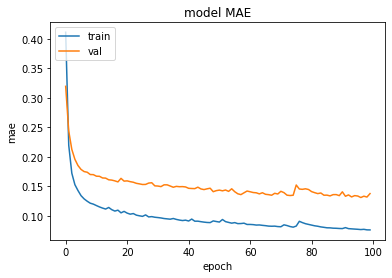

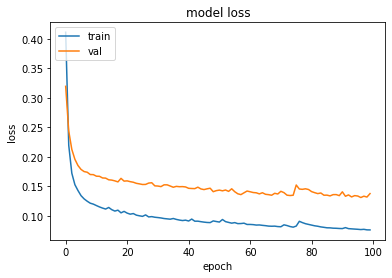

Elapsed time for training with SGD: 11.508582830429077
7/7 [==============================] - 0s 3ms/step - loss: 0.1036 - mae: 0.1036
Model performance, baseline, MAE loss w/ SGD Opt: [0.1036212369799614, 0.1036212369799614]


In [ ]:

model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

#Compiling the model
model.compile(optimizer=sgd_opt, loss=MAE_loss, metrics=["mae"])

history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)

generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=sgd_opt, loss=MAE_loss, metrics=['mae'])

st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with SGD: {elapsed_time}')
print(f'Model performance, baseline, MAE loss w/ SGD Opt: {model.evaluate(X_test, y_test)}')

Pretty good performance right off the shelf

In [ ]:
model = initial_model()

#Changing the learning rate
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD")

#Compiling the model
model.compile(optimizer=sgd_opt, loss=MAE_loss, metrics=["mae"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=100, 
                    batch_size= 32,
                    # validation_data=(X_val,y_val),
                    verbose=0)

# generate_plots(history)
et = time.time()
elapsed_time = et - st

print(f'Elapsed time for training with SGD: {elapsed_time}')
print(f'Model performance, baseline, MAE loss w/ SGD Opt: {model.evaluate(X_test, y_test)}')

Elapsed time for training with SGD: 12.13770318031311
7/7 [==============================] - 0s 3ms/step - loss: 0.0997 - mae: 0.0997
Model performance, baseline, MAE loss w/ SGD Opt: [0.09967463463544846, 0.09967463463544846]


Improvement from .1041 --> .1037
Params: LR = default nesterov=True, epochs=100, batch_size=32

### RMSprop

In [ ]:
rms_opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

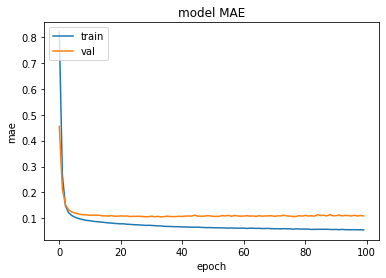

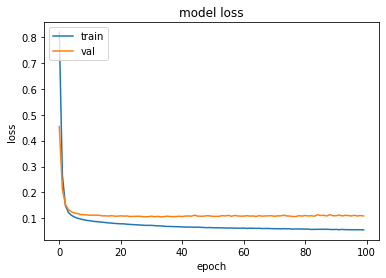

Elapsed time for training with RMSprop: 14.09187126159668
7/7 [==============================] - 0s 3ms/step - loss: 0.1100 - mae: 0.1100
Model performance, baseline, MAE loss w/ RMSprop Opt (w/ default settings): [0.10998815298080444, 0.10998815298080444]


In [ ]:
model = initial_model()

#Changing the learning rate
rms_opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

#Compiling the model
model.compile(optimizer=rms_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)


generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=rms_opt, loss=MAE_loss, metrics=['mae'])
st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with RMSprop: {elapsed_time}')
print(f'Model performance, baseline, MAE loss w/ RMSprop Opt (w/ default settings): {model.evaluate(X_test, y_test)}')

Lets start tuning

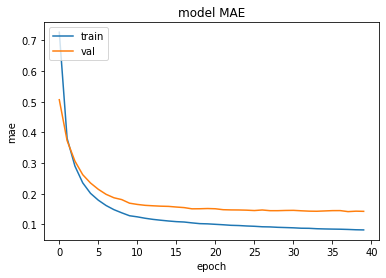

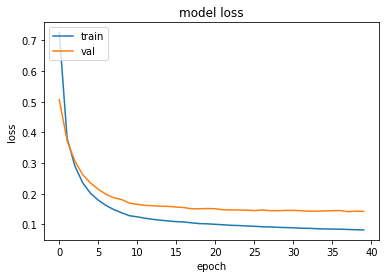

In [ ]:
model = initial_model()

#Changing the learning rate
rms_opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.00050,
    rho=0.8,
    momentum=0.0,
    epsilon=1e-07,
    centered=True,
    name="RMSprop"
)

#Compiling the model
model.compile(optimizer=rms_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=40, 
                    batch_size= 64,
                    validation_data=(X_val,y_val),
                    verbose=0)


generate_plots(history)

Better, let's just set the epochs cutoff to like 25 and re-train

In [ ]:
model = initial_model()

#Changing the learning rate
rms_opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.00050,
    rho=0.8,
    momentum=0.0,
    epsilon=1e-07,
    centered=True,
    name="RMSprop"
)

#Compiling the model
model.compile(optimizer=rms_opt, loss=MAE_loss, metrics=["mae"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=40,
                    batch_size= 64,
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with RMSprop: {elapsed_time}')
print(f'Model performance, optimized, MAE loss w/ RMSprop Opt : {model.evaluate(X_test, y_test)}')

Elapsed time for training with RMSprop: 5.7059102058410645
7/7 [==============================] - 0s 3ms/step - loss: 0.1069 - mae: 0.1069
Model performance, optimized, MAE loss w/ RMSprop Opt : [0.10692644864320755, 0.10692644864320755]


improvement,
params: lr = .0005
rho = 0.8
centered=True, everything else default
epochs=40, bs = 64

### Adam

In [ ]:
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

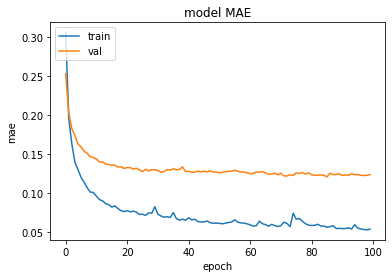

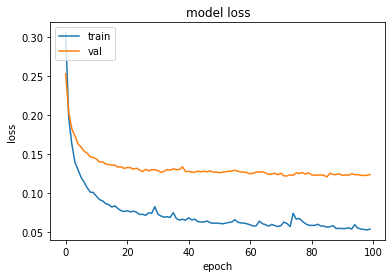

Elapsed time for training with Adam: 20.841000080108643
7/7 [==============================] - 0s 4ms/step - loss: 0.0992 - mae: 0.0992
Model performance, baseline, MAE loss w/ Adam Opt (w/ default settings): [0.09917605668306351, 0.09917605668306351]


In [ ]:
model = initial_model()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)


generate_plots(history)

# evaluating baseline:
model = initial_model()
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=['mae'])
st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, baseline, MAE loss w/ Adam Opt (w/ default settings): {model.evaluate(X_test, y_test)}')

Start tuning

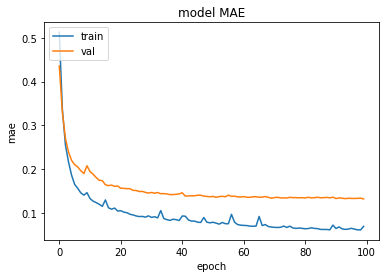

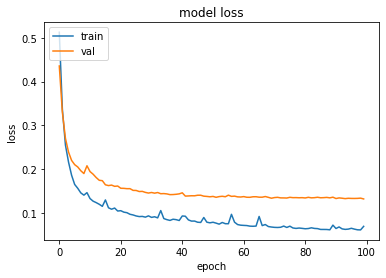

In [ ]:
model = initial_model()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.0008, #changed LR
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True, #Changed this to True
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)


generate_plots(history)


Better

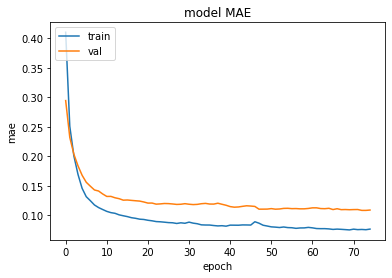

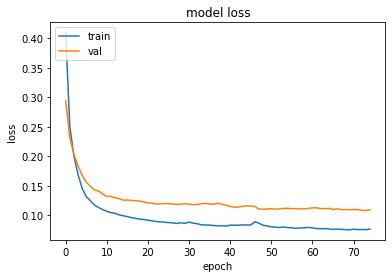

In [ ]:
model = initial_model()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.0008, #changed LR
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True, #Changed this to True
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=75, #changed epochs
                    batch_size= 64, #changed BS to 64
                    validation_data=(X_val,y_val),
                    verbose=0)


generate_plots(history)


try decreasing LR some more?

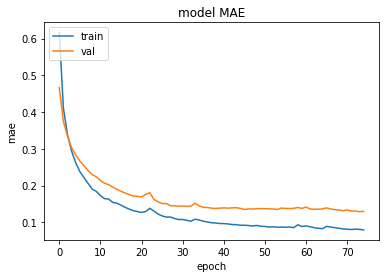

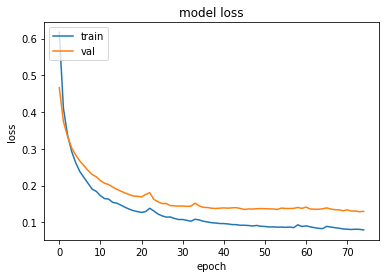

In [ ]:
model = initial_model()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.0007, #changed LR
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True, #Changed this to True
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=75, #changed epochs
                    batch_size= 64, #changed BS to 64
                    validation_data=(X_val,y_val),
                    verbose=0)


generate_plots(history)


Good, let's set to cutoff to like 50 epochs and re-train

In [ ]:
model = initial_model()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.0007, #changed LR
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True, #Changed this to True
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])

st = time.time()
history = model.fit(pd.concat([X_train, X_val]),
                    np.concatenate((y_train, y_val)),
                    epochs=70, #changed epochs
                    batch_size= 64, #changed BS to 64
                    # validation_data=(X_val,y_val),
                    verbose=0)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, optimized, MAE loss w/ Adam Opt (w/ optimized settings): {model.evaluate(X_test, y_test)}')

# generate_plots(history)


Elapsed time for training with Adam: 5.5100061893463135
7/7 [==============================] - 0s 3ms/step - loss: 0.0984 - mae: 0.0984
Model performance, optimized, MAE loss w/ Adam Opt (w/ optimized settings): [0.09844006597995758, 0.09844006597995758]


## Evaluating effects of different regularization measures

We'll evaluate the following regularization measures
* Batch Norm
* Dropout
* L2 Regularization

We'll be using Adam optimizer, with MAE loss

### Batch Norm

In [1]:
def initial_model_batchnorm():

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(12,activation='relu',input_shape=(X_train.shape[1],)))

    model.add(layers.BatchNormalization()) # adding batch norm layer

    model.add(layers.Dense(5,activation='relu'))

    model.add(layers.BatchNormalization()) # adding batch norm layer

    # model.add(layers.Dense(5,activation='relu'))

    model.add(layers.Dense(1))

    # model.compile(optimizer=opt,loss=loss,metrics=['mae'])

    # model.summary()

    return model

In [14]:
model = initial_model_batchnorm()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                1524      
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 65        
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,663
Trainable params: 1,629
Non-traina

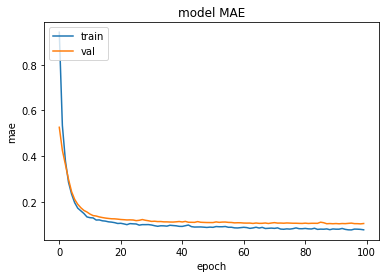

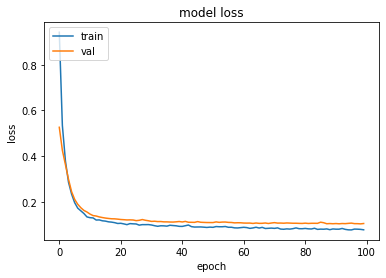

Elapsed time for training with Adam: 18.67411494255066
7/7 [==============================] - 0s 3ms/step - loss: 0.0942 - mae: 0.0942
Model performance, baseline, batchnorm: [0.09422895312309265, 0.09422895312309265]


In [ ]:
model = initial_model_batchnorm()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)
generate_plots(history)

# evaluating baseline:
model = initial_model_batchnorm()
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=['mae'])
st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, baseline, batchnorm: {model.evaluate(X_test, y_test)}')

### Dropout

In [16]:
def initial_model_dropout():

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(12,activation='relu',input_shape=(X_train.shape[1],)))

    # model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.15))

    model.add(layers.Dense(5,activation='relu'))

    # model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.10))

    # model.add(layers.Dense(5,activation='relu'))

    model.add(layers.Dense(1))

    # model.compile(optimizer=opt,loss=loss,metrics=['mae'])

    # model.summary()

    return model

In [17]:
model = initial_model_dropout()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                1524      
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,595
Trainable params: 1,595
Non-trainable params: 0
_________________________________________________________________


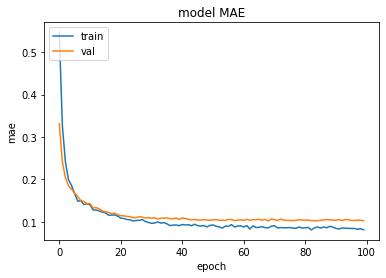

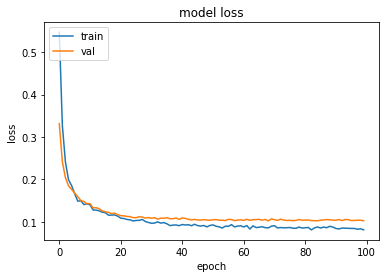

Elapsed time for training with Adam: 20.91236424446106
7/7 [==============================] - 0s 3ms/step - loss: 0.0986 - mae: 0.0986
Model performance, baseline, dropout: [0.09863577783107758, 0.09863577783107758]


In [ ]:
model = initial_model_dropout()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)
generate_plots(history)

# evaluating baseline:
model = initial_model_dropout()
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=['mae'])
st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, baseline, dropout: {model.evaluate(X_test, y_test)}')

Let's try to reduce the LR ever so slightly and then re-train

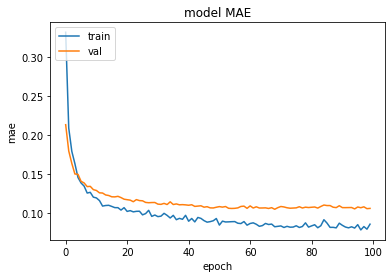

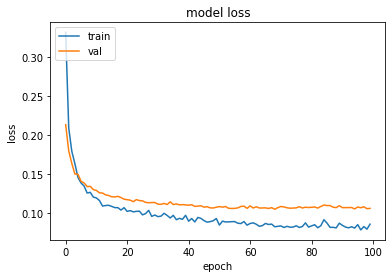

In [ ]:
model = initial_model_dropout()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.00095,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)
generate_plots(history)

That made it worst, baseline was better

In [ ]:
# evaluating baseline:
model = initial_model_dropout()

model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=['mae'])

st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)

et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, baseline, dropout: {model.evaluate(X_test, y_test)}')

Elapsed time for training with Adam: 20.91102409362793
7/7 [==============================] - 0s 3ms/step - loss: 0.0921 - mae: 0.0921
Model performance, baseline, dropout: [0.09210946410894394, 0.09210946410894394]


### Weight Decay

In [ ]:
def initial_model_l1l2reg():

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(12,activation='relu',input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01))) #L1 and L2 regularization

    # model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(rate=0.15))

    model.add(layers.Dense(5,activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.00))) #L1 only

    # model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(rate=0.10))

    # model.add(layers.Dense(5,activation='relu'))

    model.add(layers.Dense(1))

    # model.compile(optimizer=opt,loss=loss,metrics=['mae'])

    # model.summary()

    return model

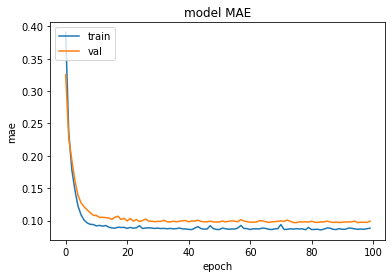

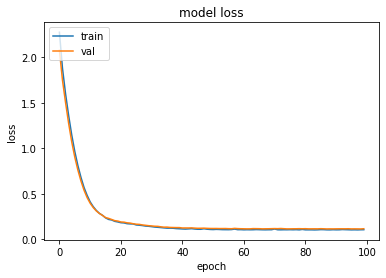

Elapsed time for training with Adam: 20.920093536376953
7/7 [==============================] - 0s 3ms/step - loss: 0.1026 - mae: 0.0886
Model performance, baseline, l1,l2 reg: [0.10261630266904831, 0.08860809355974197]


In [ ]:
model = initial_model_l1l2reg()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)
generate_plots(history)

# evaluating baseline:
model = initial_model_l1l2reg()
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=['mae'])
st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, baseline, l1,l2 reg: {model.evaluate(X_test, y_test)}')

### All combined

In [ ]:
def model_combined_reg():

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(12,activation='relu',input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01))) #L1 and L2 regularization

    # model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.15))

    model.add(layers.Dense(5,activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.00))) #L1 only

    model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(rate=0.10))

    # model.add(layers.Dense(5,activation='relu'))

    model.add(layers.Dense(1))

    # model.compile(optimizer=opt,loss=loss,metrics=['mae'])

    # model.summary()

    return model

In [ ]:
model = model_combined_reg()
model.summary()

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_286 (Dense)           (None, 12)                1524      
                                                                 
 dropout_10 (Dropout)        (None, 12)                0         
                                                                 
 dense_287 (Dense)           (None, 5)                 65        
                                                                 
 batch_normalization_4 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_288 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,615
Trainable params: 1,605
Non-trainable params: 10
__________________________________________________

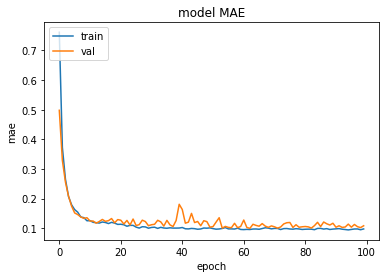

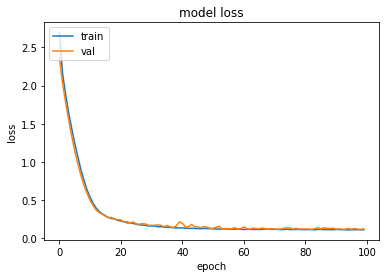

Elapsed time for training with Adam: 16.545135736465454
7/7 [==============================] - 0s 3ms/step - loss: 0.1068 - mae: 0.0919
Model performance, baseline, all reg. combined: [0.10679186135530472, 0.09192871302366257]


In [ ]:
model = model_combined_reg()

#Changing the learning rate
adam_opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

#Compiling the model
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=["mae"])


history = model.fit(X_train,
                    y_train,
                    epochs=100, 
                    batch_size= 32,
                    validation_data=(X_val,y_val),
                    verbose=0)
generate_plots(history)

# evaluating baseline:
model = model_combined_reg()
model.compile(optimizer=adam_opt, loss=MAE_loss, metrics=['mae'])
st = time.time()
model.fit(pd.concat([X_train, X_val]),
          np.concatenate((y_train, y_val)),
          epochs=100,
          batch_size=32,
          verbose=0
)
et = time.time()
elapsed_time = et - st
print(f'Elapsed time for training with Adam: {elapsed_time}')
print(f'Model performance, baseline, all reg. combined: {model.evaluate(X_test, y_test)}')